# Communication in Crisis

## Executive Summary

## Background

## Acquire
Data: [Los Angeles Parking Citations](https://www.kaggle.com/cityofLA/los-angeles-parking-citations)<br>

Let's acquire the parking citations data from our file, `parking-citations.csv`.

__Initial findings__
- `Issue time` is quasi-normally distributed.
    - It's interesting to see the distribution of our activity on earth follows a normal distribution.
- Agencies 50+ write the most parking citations.
- Most parking citations are less than $100.00

## Prepare

- Remove spaces and lowercase all column names.
- Cast `Plate Expiry Date` to datetime data type.
- Cast `Issue Date` and `Issue Time` to datetime data types.
- Drop columns missing >=74.42% of their values. 
- Drop duplicate values.
- Transform Latitude and Longitude columns from NAD1983StatePlaneCaliforniaVFIPS0405 feet projection to EPSG:4326 World Geodetic System 1984: used in GPS [Standard]
- Filter the data on these conditions:
    - Citations issued from 2017-01-01 to 2021-04-12.
    - Street Sweeping violations where `Violation Description` == __"NO PARK/STREET CLEAN"__

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium.plugins as plugins
from IPython.display import HTML

import datetime
import calplot
import folium
import math
sns.set()

import src

In [2]:
# Prepare the data using a function stored in prepare.py
df = src.prep_sweep_data()

# Display the first two rows
df.head(2)

,issue_date,issue_time,rp_state_plate,plate_expiry_date,make,body_style,color,location,route,agency,violation_description,fine_amount,latitude,longitude,day_of_week,issue_year,issue_hour,issue_minute
0,2017-01-03 00:00:00,1900-01-01 12:18:00,CA,2017-12-01 00:00:00,NISS,PA,WT,508 GARDNER ST N,00472,54,NO PARK/STREET CLEAN,73.0,34.0804,-118.3532,Tuesday,2017,12,18
1,2017-01-03 00:00:00,1900-01-01 08:38:00,CA,2017-05-01 00:00:00,CHEV,PA,BK,400 LE DOUX ROAD,00472,54,NO PARK/STREET CLEAN,73.0,34.0719,-118.3774,Tuesday,2017,8,38


In [3]:
# Check the column data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036169 entries, 0 to 2036168
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   issue_date             object 
 1   issue_time             object 
 2   rp_state_plate         object 
 3   plate_expiry_date      object 
 4   make                   object 
 5   body_style             object 
 6   color                  object 
 7   location               object 
 8   route                  object 
 9   agency                 int64  
 10  violation_description  object 
 11  fine_amount            float64
 12  latitude               float64
 13  longitude              float64
 14  day_of_week            object 
 15  issue_year             int64  
 16  issue_hour             int64  
 17  issue_minute           int64  
dtypes: float64(3), int64(4), object(11)
memory usage: 279.6+ MB


# Exploration
---

## Parking Enforcement is Enforced Again: Where it all started
### City Council Demands a Plan
The **Los Angeles City Council** tasked the **Los Angeles Department of Transportation** (LADOT) with creating a phased plan to resume parking enforcement on October 1st. Delayed parking enforcement added to the city's financial strain during the pandemic, with citation revenue 62% below budget.[1]

### A Plan is Formed: How to Collect Revenue, Detailed. Outreach, Vague
On September 30th city council voted to resume parking enforcement on October 15th. Between October 1st and October 14th, 2020 LADOT was responsible for informing the public [2] using social media and the press.[3]

1. `public-records\city-council-documents\LADOT-transition-plan.pdf`
2. `public-records\city-council-documents\public-outreach-period.pdf`
3. `public-records\LADOT-press-releases\enforcement.pdf`




---

## Informing the Public
The Los Angeles Department of Transportation informed the public of steet sweeping violations using flyers on wind shields, the press, and social media.

### Communication Channels

#### Social Media

#### Flyers

#### Newspapers

#### TV News

Let's take a look at social engagement  

## Twitter: Tweets from City Officials


----

## Street Sweeping Citations


##

### How much revenue is generated from street sweeper citations daily?

In [4]:
# Daily street sweeping citation revenue
daily_revenue = df.groupby('issue_date').fine_amount.sum()
daily_revenue.index = pd.to_datetime(daily_revenue.index)

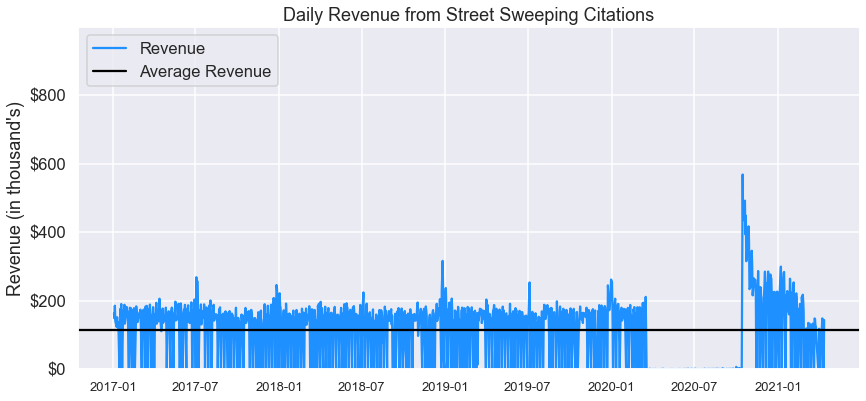

In [5]:
sns.set_context('talk')

# Plot daily revenue from street sweeping citations
daily_revenue.plot(figsize=(14, 7), label='Revenue', color='DodgerBlue')
plt.axhline(daily_revenue.mean(), color='black', label='Average Revenue')

plt.title("Daily Revenue from Street Sweeping Citations")
plt.xlabel('')
plt.ylabel("Revenue (in thousand's)")

plt.xticks(rotation=0, horizontalalignment='center', fontsize=13)
plt.yticks(range(0, 1_000_000, 200_000), ['$0', '$200', '$400', '$600', '$800'])
plt.ylim(0, 1_000_000)

plt.legend(loc=2, framealpha=.8);

> __Anomaly 1__: What happened between July/August of 2019 toh January of 2020?<br>
>
> __Anomaly 2__: Between March 2020 and October 2020 a Local Emergency was Declared by the Mayor of Los Angeles in response to COVID-19. Street Sweeping was halted to help Angelenos shelter in place. _Street Sweeping resumed on 10/15/2020_.

### Anomaly 2: Declaration of Local Emergency

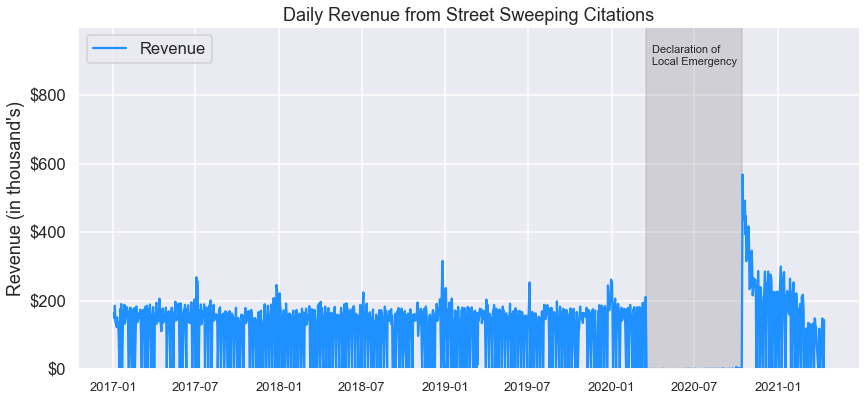

In [6]:
sns.set_context('talk')

# Plot daily revenue from street sweeping citations
daily_revenue.plot(figsize=(14, 7), label='Revenue', color='DodgerBlue')
plt.axvspan('2020-03-16', '2020-10-14', color='grey', alpha=.25)
plt.text('2020-03-29', 890_000, 'Declaration of\nLocal Emergency', fontsize=11)


plt.title("Daily Revenue from Street Sweeping Citations")
plt.xlabel('')
plt.ylabel("Revenue (in thousand's)")

plt.xticks(rotation=0, horizontalalignment='center', fontsize=13)
plt.yticks(range(0, 1_000_000, 200_000), ['$0', '$200', '$400', '$600', '$800'])
plt.ylim(0, 1_000_000)

plt.legend(loc=2, framealpha=.8);

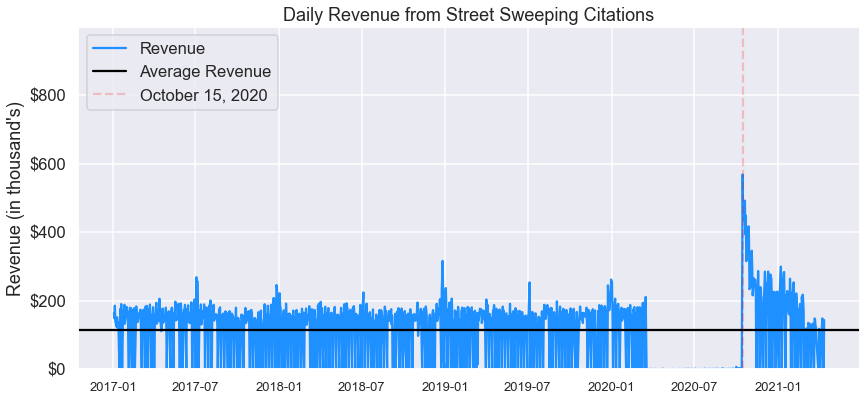

In [7]:
sns.set_context('talk')

# Plot daily revenue from street sweeping citations
daily_revenue.plot(figsize=(14, 7), label='Revenue', color='DodgerBlue')
plt.axhline(daily_revenue.mean(), color='black', label='Average Revenue')
plt.axvline(datetime.datetime(2020, 10, 15), color='red', linestyle="--", label='October 15, 2020', alpha=.2)

plt.title("Daily Revenue from Street Sweeping Citations")
plt.xlabel('')
plt.ylabel("Revenue (in thousand's)")

plt.xticks(rotation=0, horizontalalignment='center', fontsize=13)
plt.yticks(range(0, 1_000_000, 200_000), ['$0', '$200', '$400', '$600', '$800'])
plt.ylim(0, 1_000_000)

plt.legend(loc=2, framealpha=.8);

## Twitter

## Hypothesis Test
### General Inquiry
Is the daily citation revenue after 10/15/2020 significantly greater than average?

### Z-Score

$H_0$: The daily citation revenue after 10/15/2020 is less than or equal to the average daily revenue.

$H_a$: The daily citation revenue after 10/15/2020 is significantly greater than average.

In [8]:
confidence_interval = .997

# Directional Test
alpha = (1 - confidence_interval)/2

In [9]:
# Data to calculate z-scores using precovid values to calculate the mean and std
daily_revenue_precovid = df.loc[df.issue_date < '2020-06-01']
daily_revenue_precovid = daily_revenue_precovid.groupby('issue_date').fine_amount.sum()
mean_precovid, std_precovid = daily_revenue_precovid.agg(['mean', 'std']).values

In [10]:
mean, std = daily_revenue.agg(['mean', 'std']).values

# Calculating Z-Scores using precovid mean and std
z_scores_precovid = (daily_revenue - mean_precovid)/std_precovid
z_scores_precovid.index = pd.to_datetime(z_scores_precovid.index)

sig_zscores_pre_covid = z_scores_precovid[z_scores_precovid>3]

# Calculating Z-Scores using entire data
z_scores = (daily_revenue - mean)/std
z_scores.index = pd.to_datetime(z_scores.index)

sig_zscores = z_scores[z_scores>3]

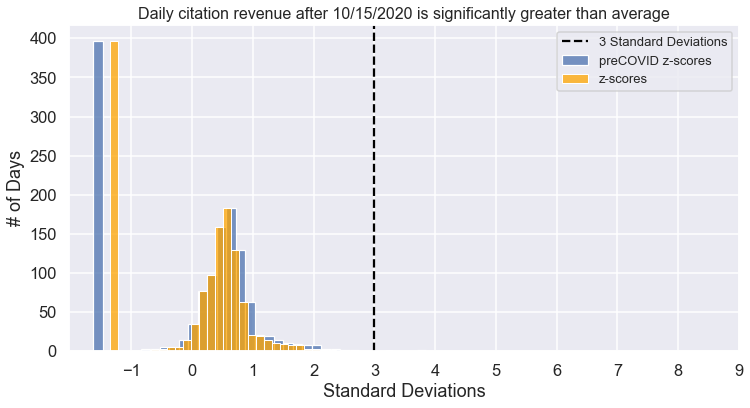

In [11]:
sns.set_context('talk')

plt.figure(figsize=(12, 6))
sns.histplot(data=z_scores_precovid,
             bins=50,
             label='preCOVID z-scores')


sns.histplot(data=z_scores,
             bins=50,
             color='orange',
             label='z-scores')

plt.title('Daily citation revenue after 10/15/2020 is significantly greater than average', fontsize=16)
plt.xlabel('Standard Deviations')
plt.ylabel('# of Days')

plt.axvline(3, color='Black', linestyle="--", label='3 Standard Deviations')

plt.xticks(np.linspace(-1, 9, 11))
plt.legend(fontsize=13);

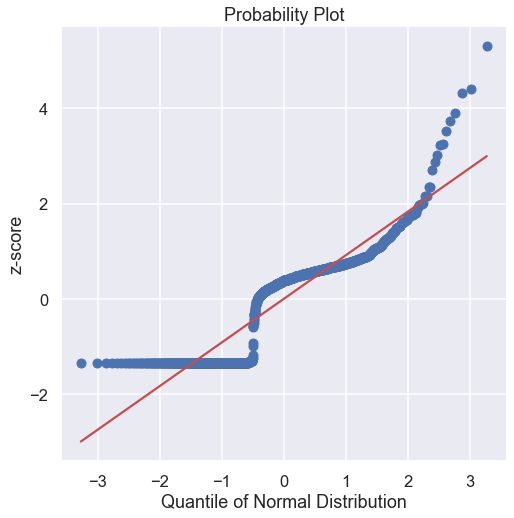

In [12]:
a = stats.zscore(daily_revenue)

fig, ax = plt.subplots(figsize=(8, 8))

stats.probplot(a, plot=ax)
plt.xlabel("Quantile of Normal Distribution")
plt.ylabel("z-score");

### p-values

In [13]:
p_values_precovid = z_scores_precovid.apply(stats.norm.cdf)
p_values = z_scores_precovid.apply(stats.norm.cdf)

significant_dates_precovid = p_values_precovid[(1-p_values_precovid) < alpha]
significant_dates = p_values[(1-p_values) < alpha]

In [14]:
# The chance of an outcome occuring by random chance
print(f'{alpha:0.3%}')

0.150%


### Cohen's D

In [15]:
fractions = [.1, .2, .5, .7, .9]
cohen_d = []

for percentage in fractions:
    cohen_d_trial = []
    
    for i in range(10000):
        sim = daily_revenue.sample(frac=percentage)
        sim_mean = sim.mean()

        d = (sim_mean - mean) / (std/math.sqrt(int(len(daily_revenue)*percentage)))
        cohen_d_trial.append(d)
    
    cohen_d.append(np.mean(cohen_d_trial))

In [16]:
cohen_d

[-0.00434705172848518,
 0.0013980704976141226,
 0.012827983850820568,
 0.003296376680577133,
 0.00033590855876044064]

In [17]:
fractions = [.1, .2, .5, .7, .9]
cohen_d_precovid = []

for percentage in fractions:
    cohen_d_trial = []
    
    for i in range(10000):
        sim = daily_revenue_precovid.sample(frac=percentage)
        sim_mean = sim.mean()

        d = (sim_mean - mean_precovid) / (std_precovid/math.sqrt(int(len(daily_revenue_precovid)*percentage)))
        cohen_d_trial.append(d)
    
    cohen_d_precovid.append(np.mean(cohen_d_trial))

In [18]:
cohen_d_precovid

[-0.014769193249196164,
 0.012602092223776246,
 0.0020808864332231254,
 -0.00037936906820589797,
 0.003610611963628501]

### Significant Dates with less than a 0.15% chance of occuring

- All dates that are considered significant occur after 10/15/2020
- In the two weeks following 10/15/2020 significant events occured on __Tuesday's and Wednesday's__.

In [19]:
dates_precovid = set(list(sig_zscores_pre_covid.index))
dates = set(list(sig_zscores.index))


common_dates = list(dates.intersection(dates_precovid))
common_dates = pd.to_datetime(common_dates).sort_values()

In [20]:
sig_zscores

issue_date
2020-10-15    5.302432
2020-10-16    3.742924
2020-10-19    4.321437
2020-10-20    4.409453
2020-10-21    3.260118
2020-10-22    3.893320
2020-10-27    3.232773
2020-10-28    3.531856
2020-10-29    3.014014
Name: fine_amount, dtype: float64

In [21]:
pd.Series(common_dates.day_name(),
          common_dates)

2020-10-15     Thursday
2020-10-16       Friday
2020-10-19       Monday
2020-10-20      Tuesday
2020-10-21    Wednesday
2020-10-22     Thursday
2020-10-27      Tuesday
2020-10-28    Wednesday
2020-10-29     Thursday
dtype: object

In [22]:
np.random.seed(sum(map(ord, 'calplot')))

all_days = pd.date_range('1/1/2020', '12/22/2020', freq='D')

significant_events = pd.Series(np.ones_like(len(common_dates)), index=common_dates)

In [32]:
for i in significant_events.index:
    print(i)

2020-10-15 00:00:00
2020-10-16 00:00:00
2020-10-19 00:00:00
2020-10-20 00:00:00
2020-10-21 00:00:00
2020-10-22 00:00:00
2020-10-27 00:00:00
2020-10-28 00:00:00
2020-10-29 00:00:00


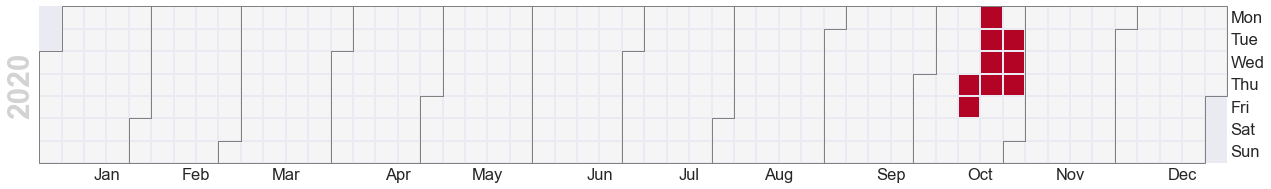

In [24]:
calplot.calplot(significant_events, figsize=(18, 12), cmap='coolwarm_r');

Reject the null hypothesis that daily citation revenue after 10/15/2020 is less than or equal to the average daily revenue.

- 2020-10-15
- 2020-10-16
- 2020-10-19
- 2020-10-20
- 2020-10-21
- 2020-10-22
- 2020-10-27
- 2020-10-28
- 2020-10-29

## Which parts of the city were impacted the most?

In [25]:
df_outliers = df.loc[df.issue_date.isin(list(common_dates.astype('str')))]

df_outliers.reset_index(drop=True, inplace=True)

In [26]:
print(df_outliers.shape)
df_outliers.head()

(0, 18)


,issue_date,issue_time,rp_state_plate,plate_expiry_date,make,body_style,color,location,route,agency,violation_description,fine_amount,latitude,longitude,day_of_week,issue_year,issue_hour,issue_minute


In [27]:
# m = folium.Map(location=[34.0522, -118.2437],
#                min_zoom=8,
#                max_bounds=True)

# mc = plugins.MarkerCluster()

# for index, row in df_outliers.iterrows():
#     mc.add_child(
        
#         folium.Marker(location=[str(row['latitude']), str(row['longitude'])],
#                       popup='Cited {} {} at {}'.format(row['day_of_week'],
#                                                        row['issue_date'],
#                                                        row['issue_time'][:-3]),
#                       control_scale=True,
#                       clustered_marker=True
#                      )
#     )
    

# m.add_child(mc)

Transfering map to Tablaeu

# Conclusions